C:\Users\Akhilesh Choudhari\AppData\Local\Temp\ipykernel_11056\3856616324.py:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  masterdata = pd.read_csv(r"D:\Siddharth Upgrad\Case Study\1. Lending club\loan.csv",header=0)
C:\Users\Akhilesh Choudhari\AppData\Local\Temp\ipykernel_11056\3856616324.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masterdata['emp_length'] = masterdata['emp_length'].fillna("< 1 year")
C:\Users\Akhilesh Choudhari\AppData\Local\Temp\ipykernel_11056\3856616324.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

BELOW IS THE LIST OF COLUMNS HAVING COMMON DATA WHICH WILL BE DROPPED
pymnt_plan
initial_list_status
policy_code
application_type
acc_now_delinq
delinq_amnt


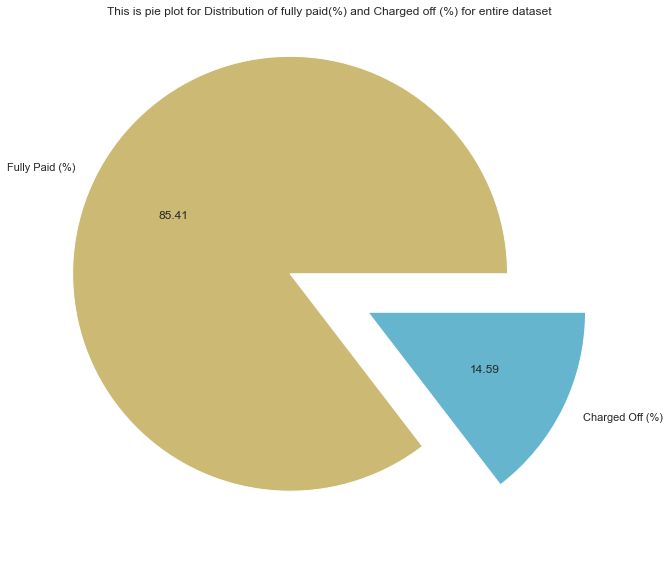


The below is a pivot table showing the count of charged off and fully paid loans for each term the lending club offers

loan_status  Charged Off  Fully Paid
term                                
 36 months          3227       25869
 60 months          2400        7081


C:\Users\Akhilesh Choudhari\AppData\Local\Temp\ipykernel_11056\3856616324.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tenure['count'] = 1


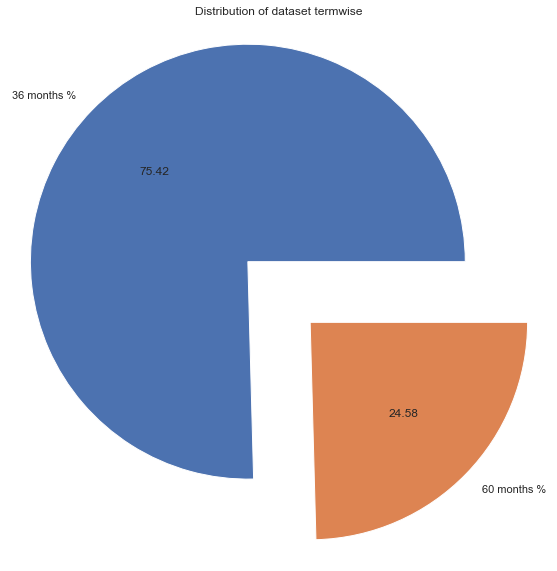

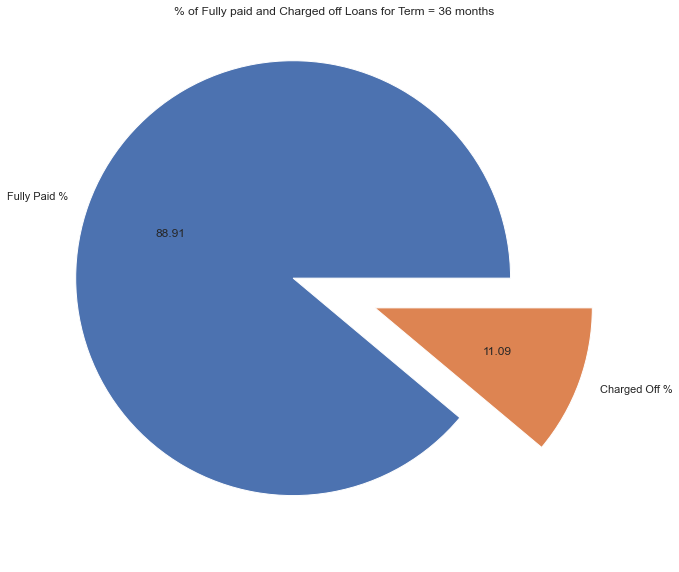

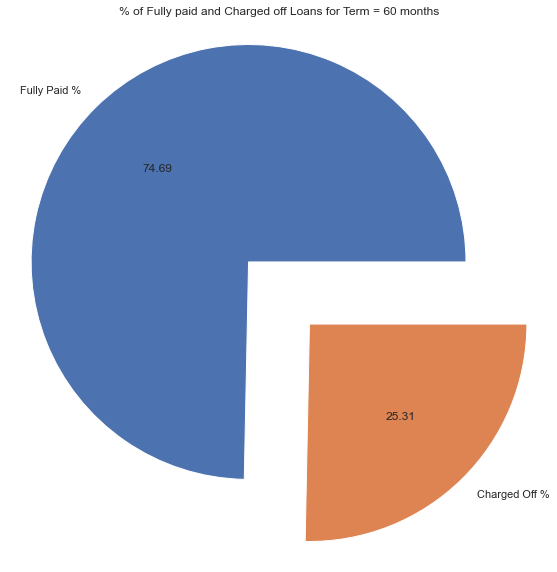

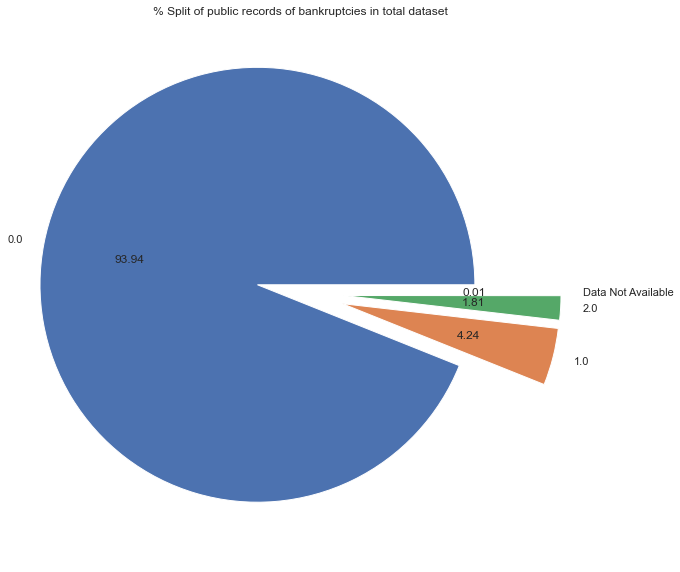

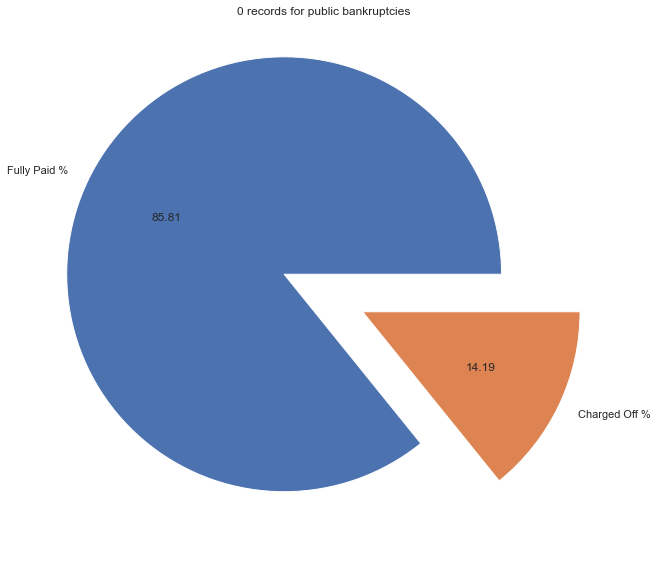

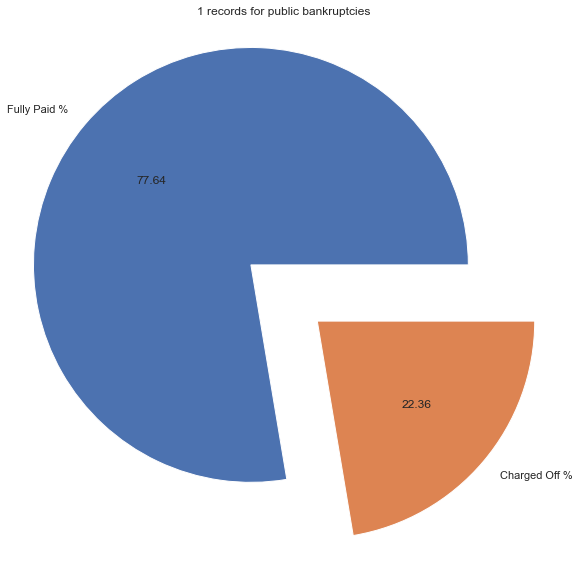

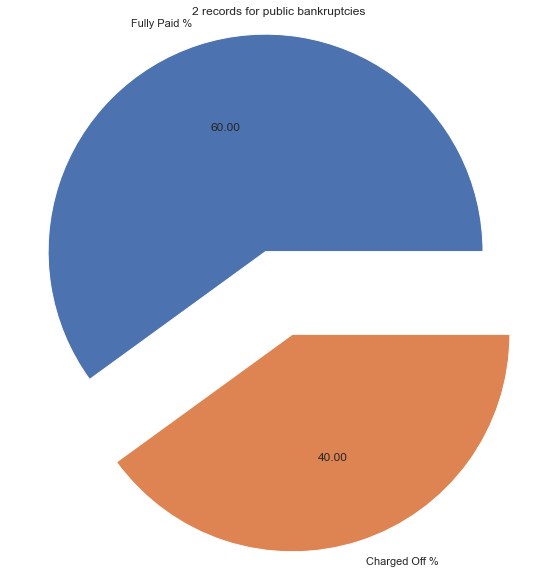

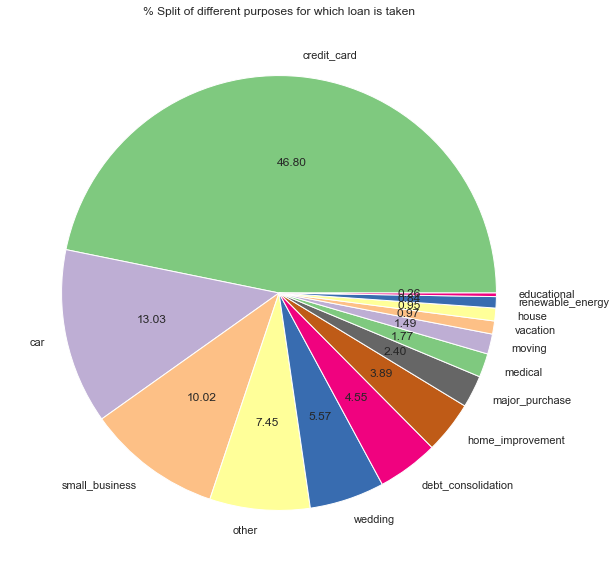

C:\Users\Akhilesh Choudhari\AppData\Local\Temp\ipykernel_11056\3856616324.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purpose['count'] = 1


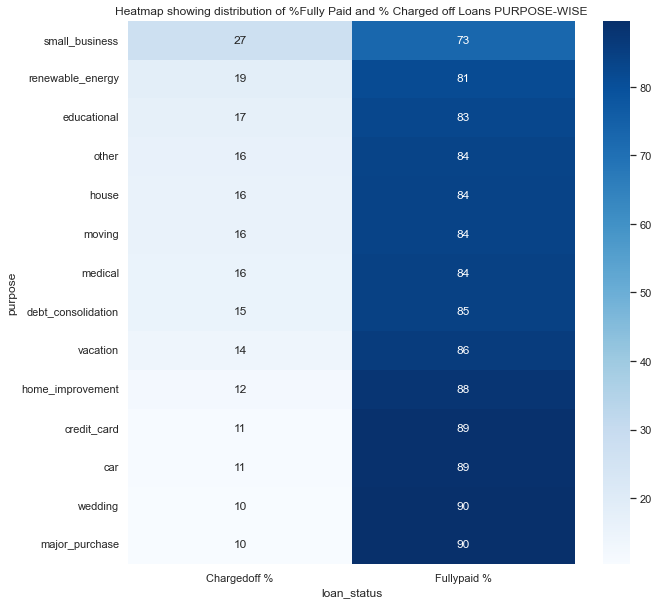

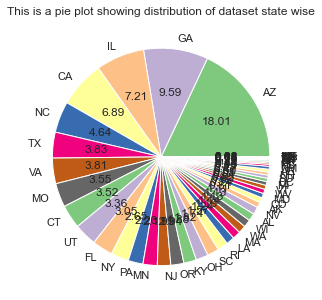

C:\Users\Akhilesh Choudhari\AppData\Local\Temp\ipykernel_11056\3856616324.py:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state['count'] = 1


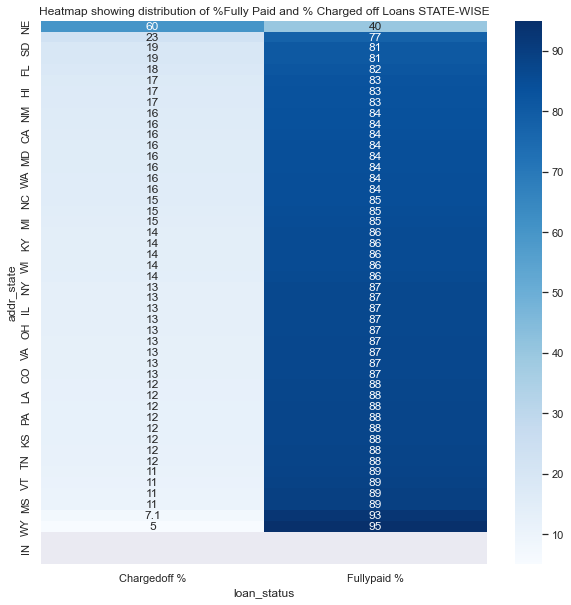

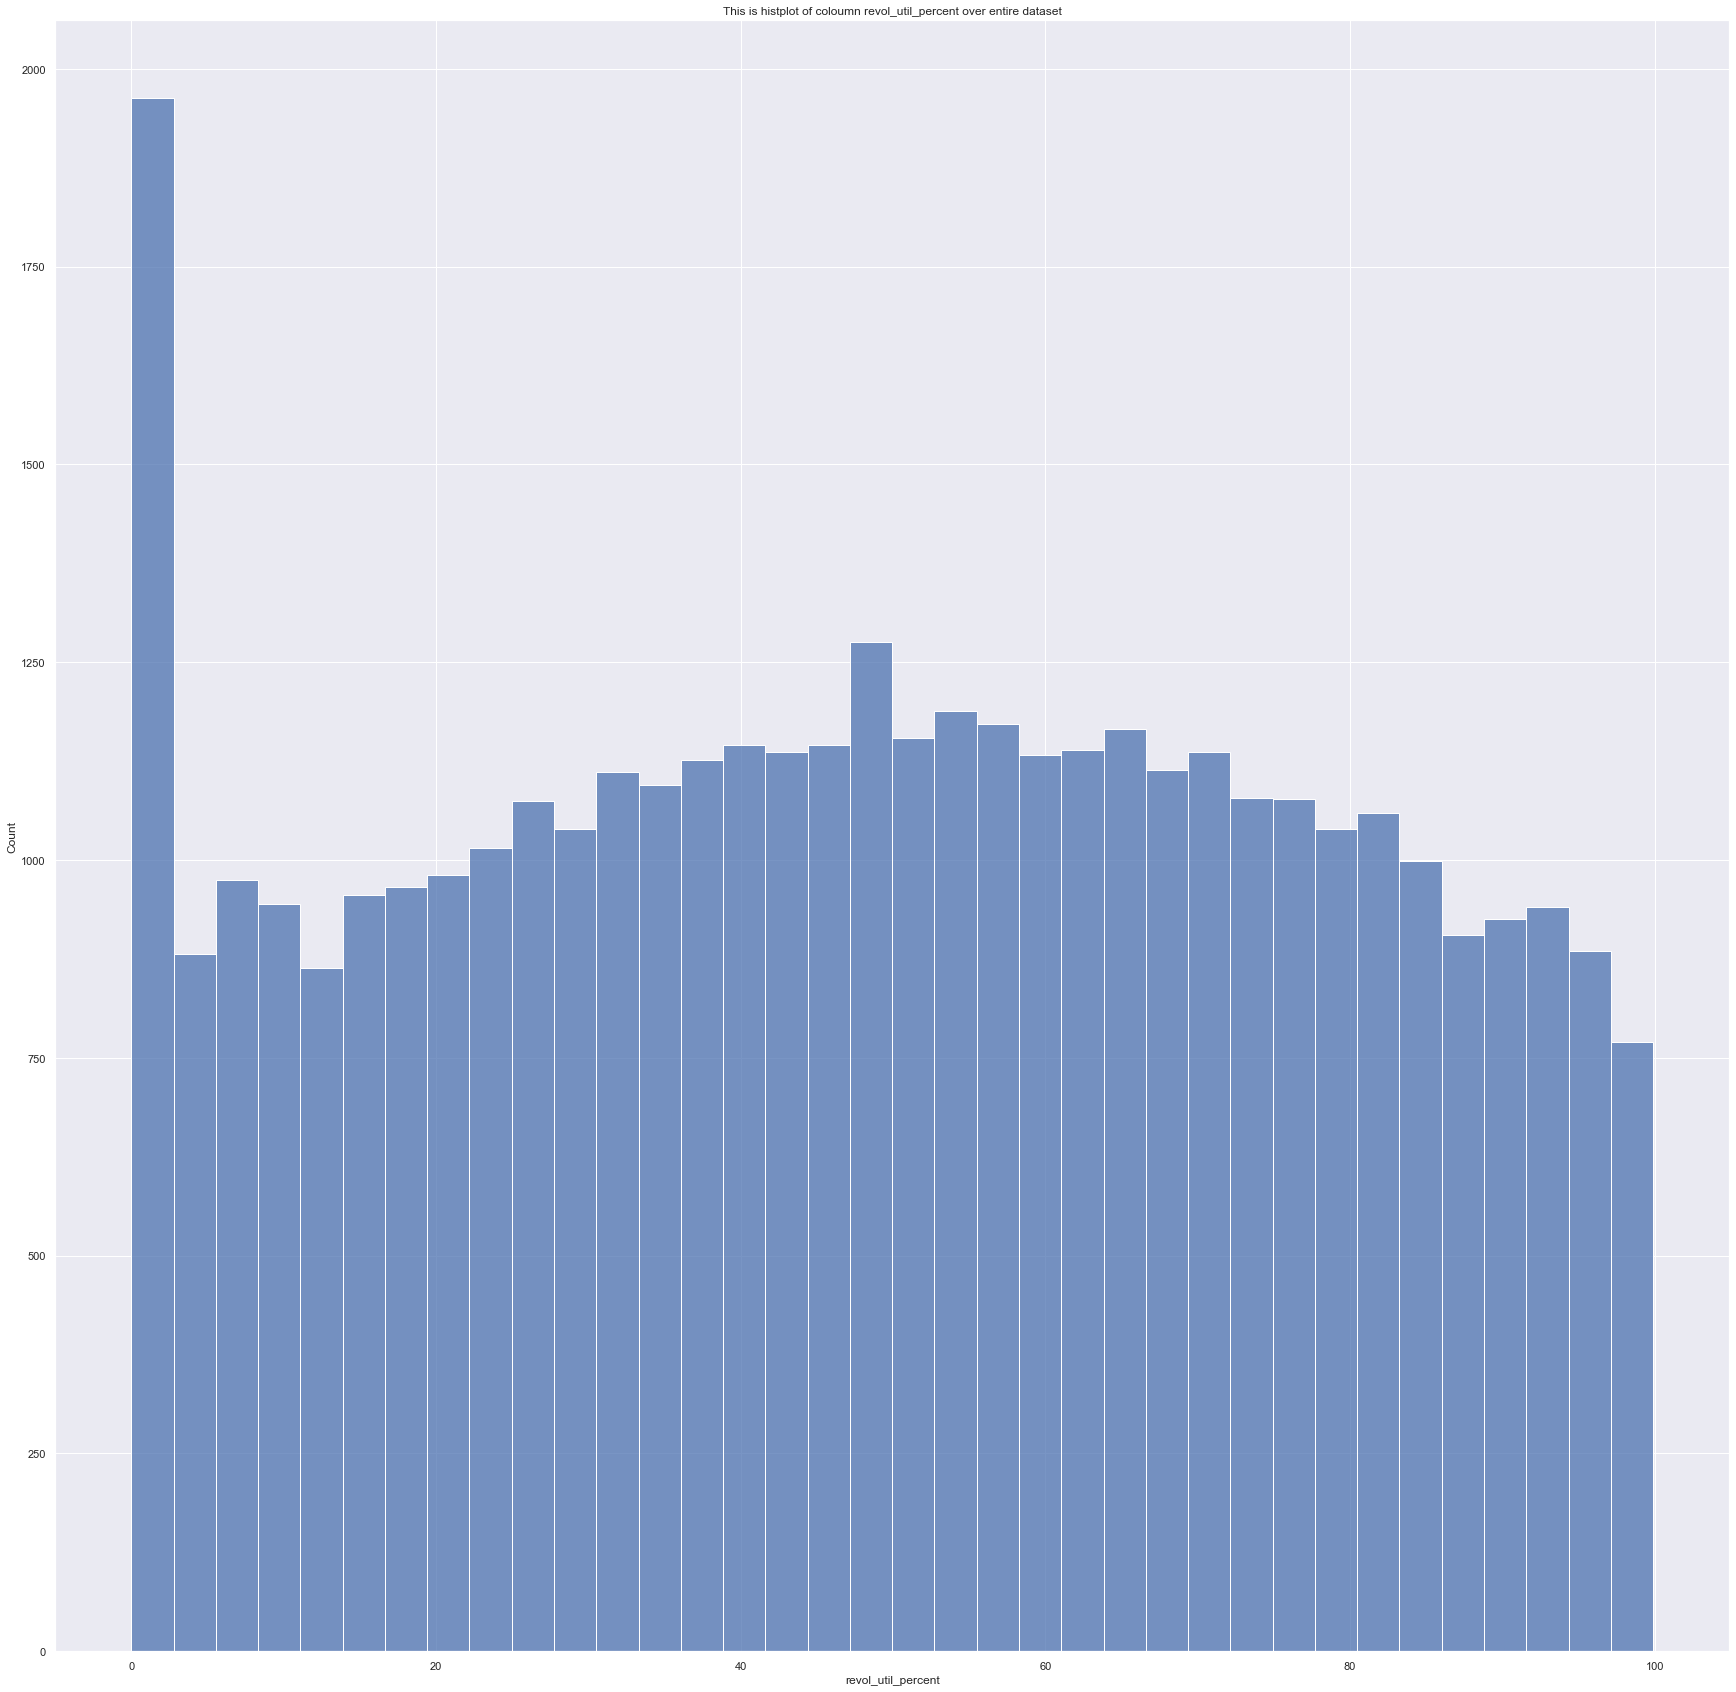

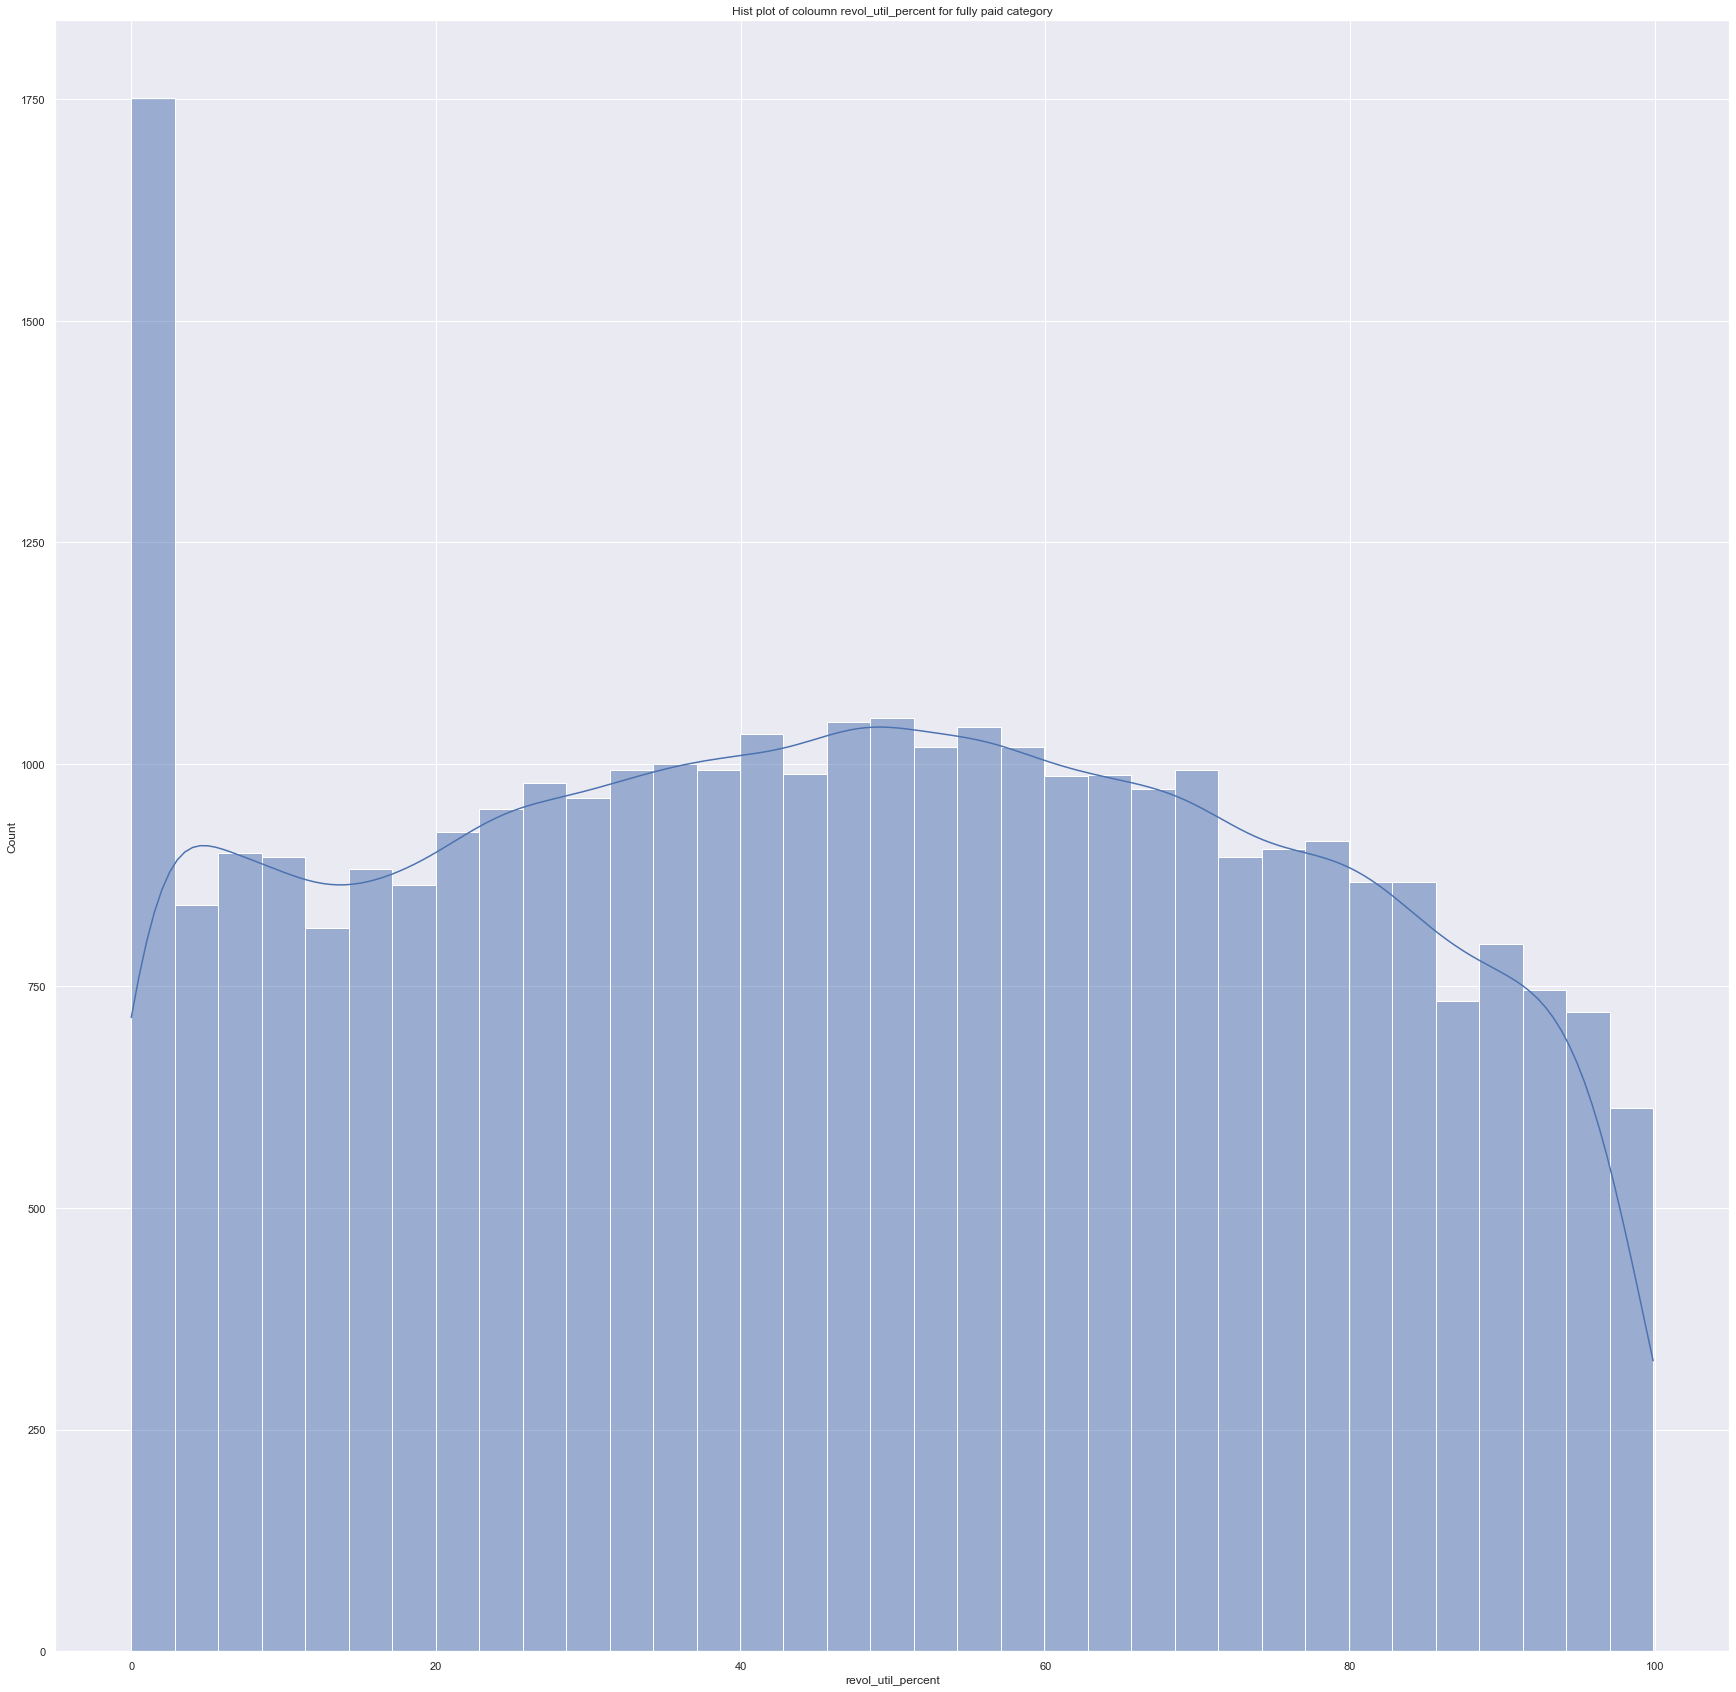

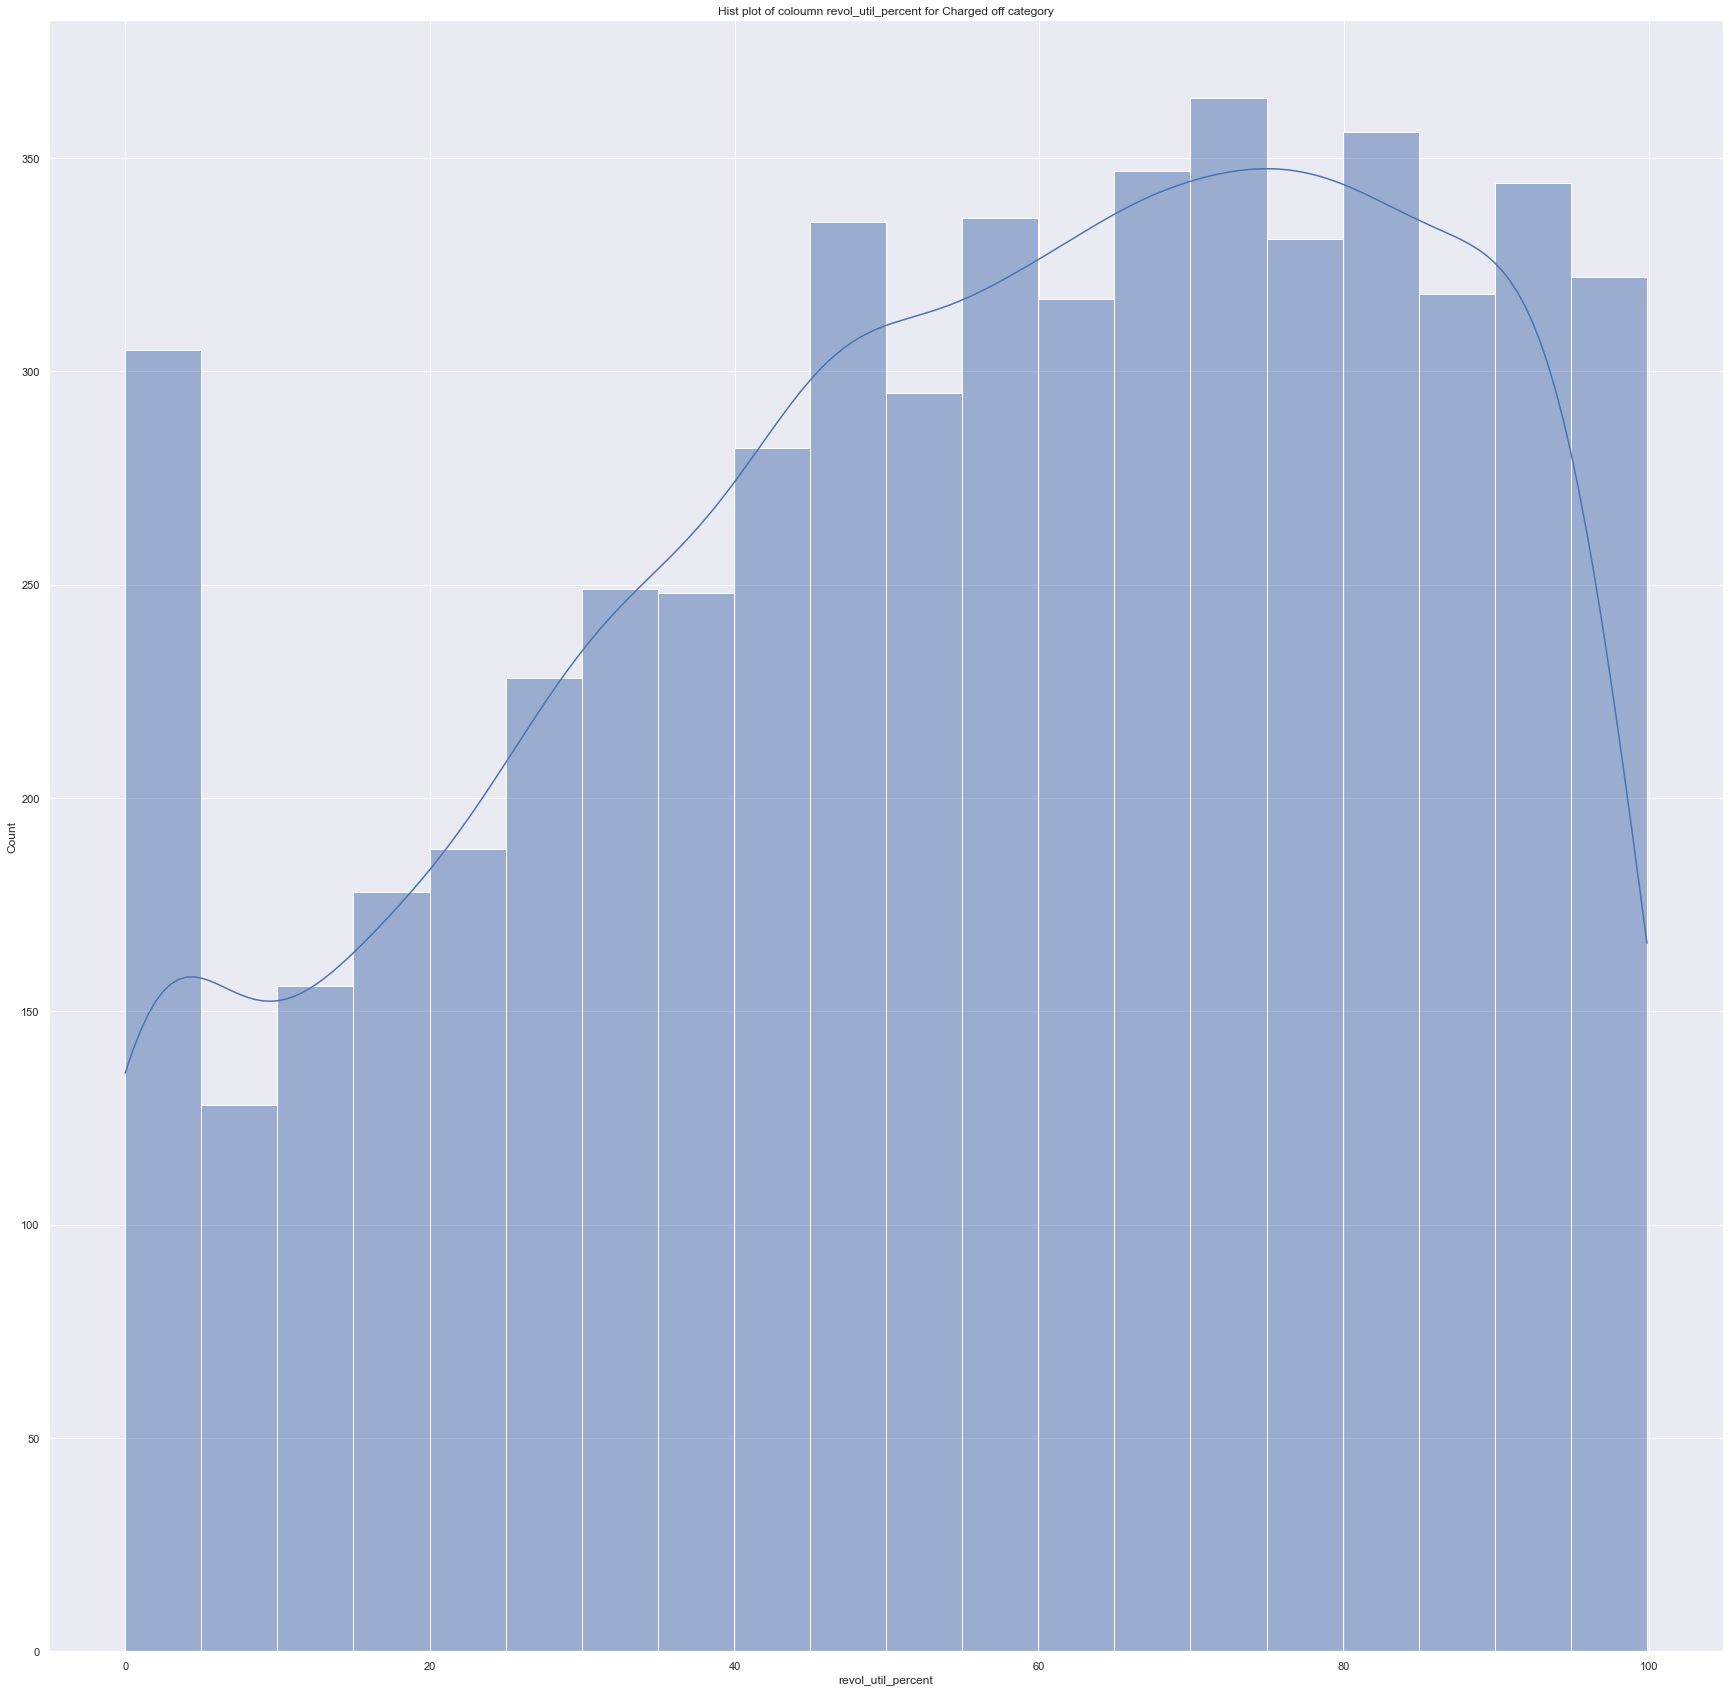

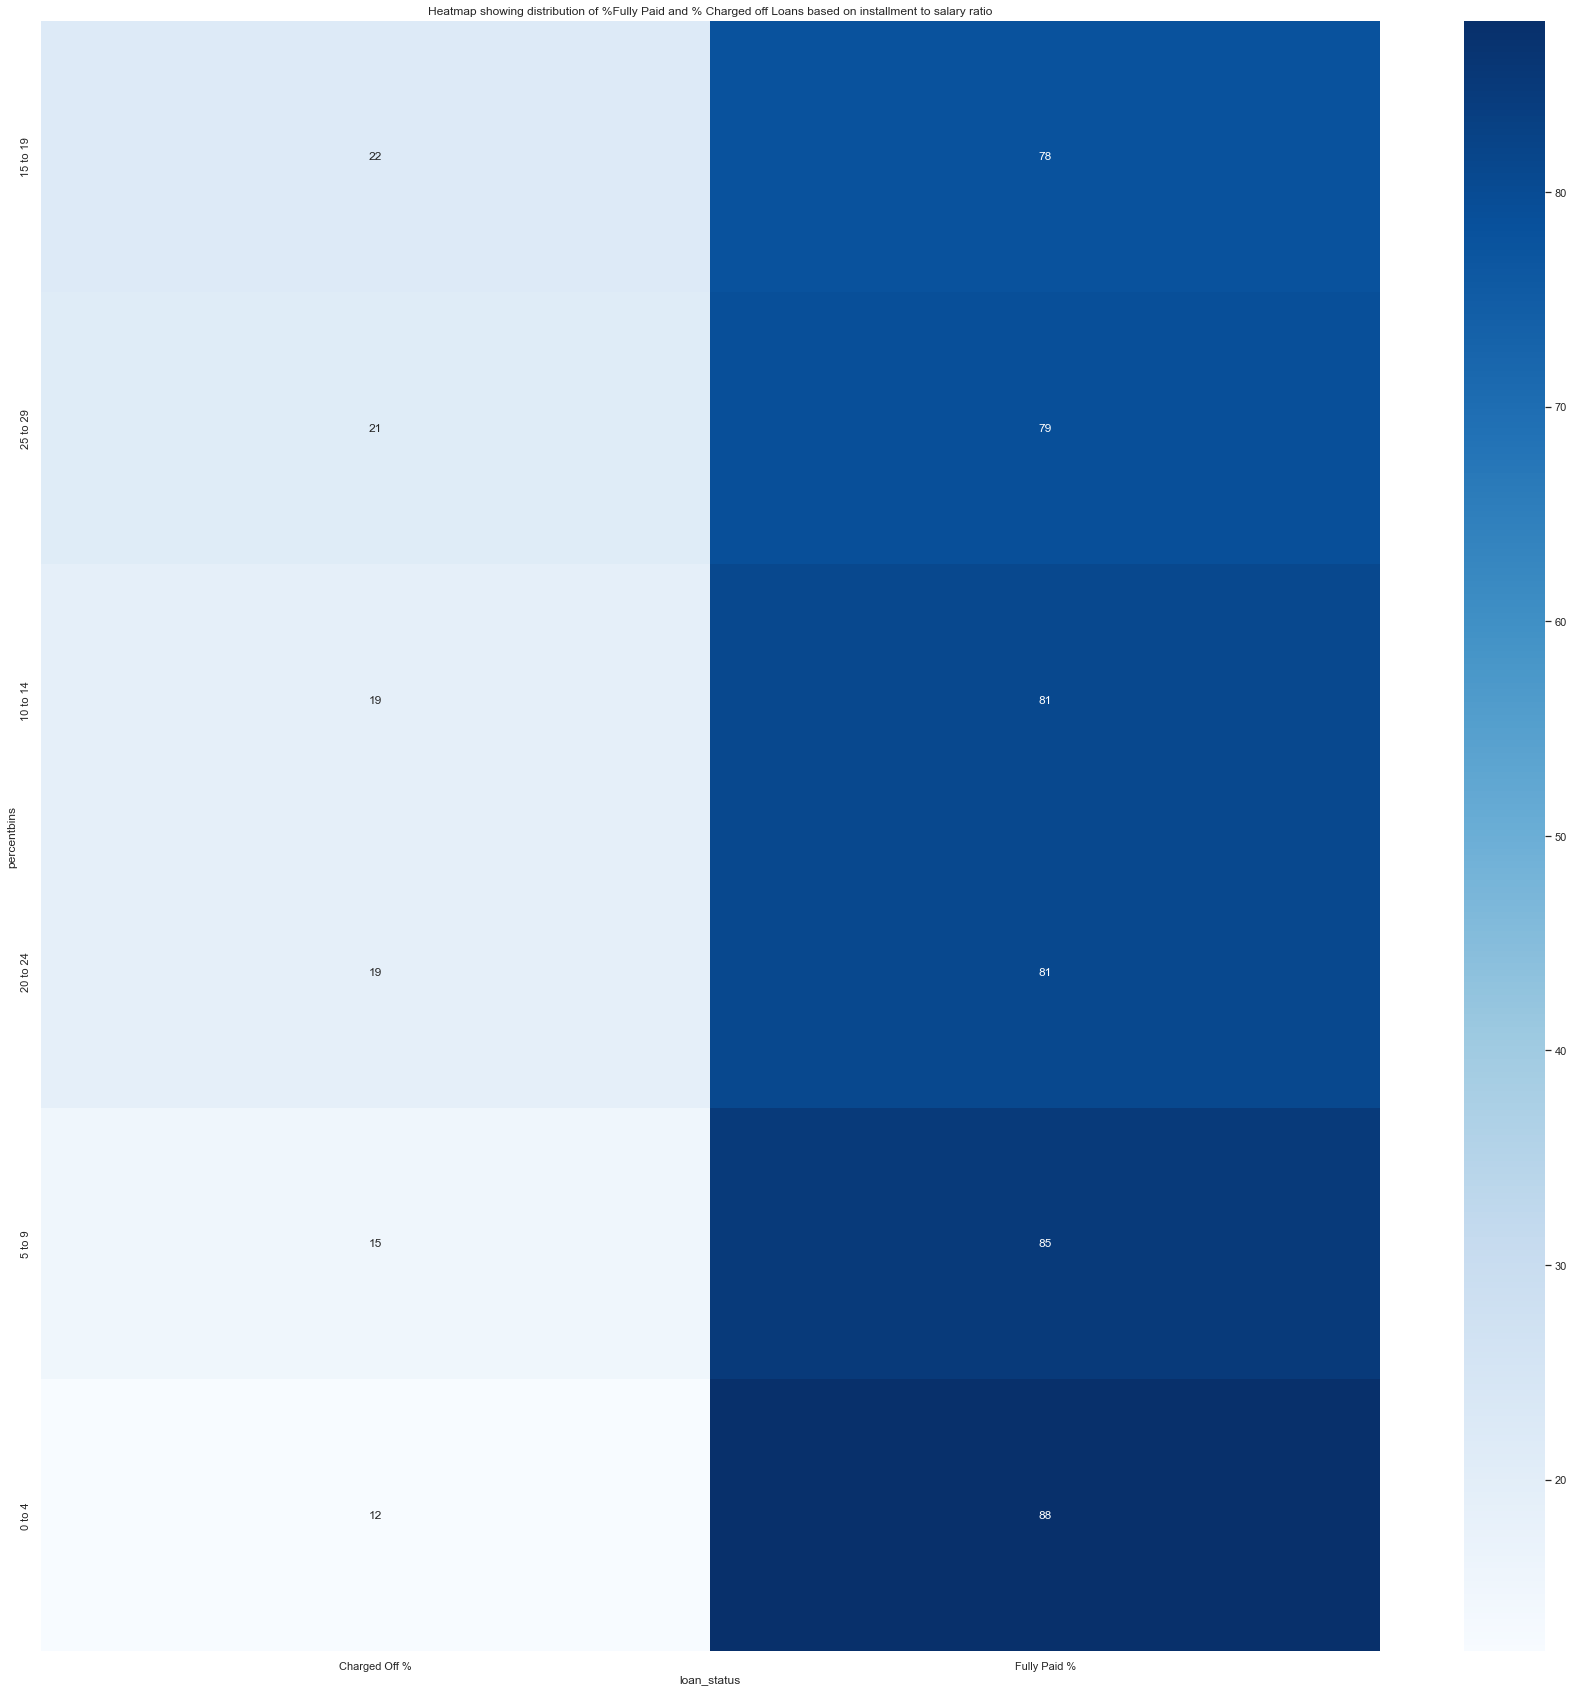

In [55]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#loading raw data from csv
masterdata = pd.read_csv(r"D:\Siddharth Upgrad\Case Study\1. Lending club\loan.csv",header=0)

#A dropping the coloumns which are completely null
masterdata = masterdata.dropna(how='all', axis=1)

#B . Taking action on partially NaN values in columns

#1. emp_length has few "NaN" values which are updated to "< 1 year".
masterdata['emp_length'] = masterdata['emp_length'].fillna("< 1 year")

#2. "emp_title" - Around 2000 entires are Not available. Knowing company name would be good to get an estimate about job security of the individual
# However This data can be treated as optional. So the NaN values are replaced with string "Data Not Available"
masterdata['emp_title'] = masterdata['emp_title'].fillna("Data Not Available")

#3. "desc" - A lot of coloums are with NAN values. Dropping this column since it will not be used in our analysis
masterdata = masterdata.drop(columns = 'desc')

#3. "title" - Different values put in by users. Dropping this column and using purpose column which will be more suitable for our analysis
masterdata = masterdata.drop(columns = 'title')

#4. "months_since_last_delinqent" - more than 25000 data is NaN. Will have no impact on analysis. Removing this column"
masterdata = masterdata.drop(columns='mths_since_last_delinq')

#5 - "mths_since_last_record" around 36000 entries are NaN. Removing this coloum
masterdata = masterdata.drop(columns = 'mths_since_last_record')

#6 - "revol_util" For this field around 50 entries are empty. Considering average utilisation of revolving credit, assigning the 
#mean values of remaining entires to the null entries. Average is coming to be around 48.2
#a new coloum is created "revol_util_percent" wherin only floating values are retained.
# The main coloum "revol_util" is retained and the NaN values are replaced with "Data NA,take mean"
masterdata['revol_util_percent'] = masterdata['revol_util']
def check_mean():
    masterdata2 = masterdata
    masterdata2 = masterdata2.dropna(axis=0 , subset = 'revol_util_percent')
    masterdata2['revol_util_percent'] = masterdata2['revol_util_percent'].apply(lambda x:float(x[:-1]))
    return(str(masterdata2['revol_util_percent'].mean()) + '%')
x = check_mean()
masterdata['revol_util_percent'] = masterdata['revol_util_percent'].fillna(x)
masterdata['revol_util_percent'] = masterdata['revol_util_percent'].apply(lambda x:round(float(x[:-1]),2))
masterdata['revol_util'] = masterdata['revol_util'].fillna("Data NA,take mean")

#7. "last_pymnt_d" - 71 entires are NaN, will have no impact on further analysis. Dropping this column
masterdata = masterdata.drop(columns = 'last_pymnt_d')

#8 - "next_pymnt_d" around 38000 entries are NaN. Removing this coloum
masterdata = masterdata.drop(columns = 'next_pymnt_d')

#9. "last_credit_pull_d" - 2 entires are NaN, will have no impact on further analysis. Dropping this column
masterdata = masterdata.drop(columns = 'last_credit_pull_d')

#10. "collections_12_mths_ex_med" has only 2 entries "0 and NAN". This will have no use in our analysis. Removing this column
masterdata = masterdata.drop(columns = 'collections_12_mths_ex_med')

#10. "chargeoff_within_12_mths" has only 2 entries "0 and NAN". This will have no use in our analysis. Removing this column
masterdata = masterdata.drop(columns = 'chargeoff_within_12_mths')

#11. "pub_rec_bankruptcies" - Coloum seems to be important for our analysis Even though majority of entires are "0". 
# Not assigning 0 to NaN directly. Replacing NaN with "Data Not Available"
masterdata['pub_rec_bankruptcies'] = masterdata['pub_rec_bankruptcies'].fillna("Data Not Available")

#12. "tax_liens" has only 2 entries "0 and NAN". This will have no use in our analysis. Removing this column
masterdata = masterdata.drop(columns = 'tax_liens')

#C Checking if there are coloumns which are having a common value throughout. Since these have common value these will not be useful
#for finding patterns or analysis. So we can study, which coloumns have common values, what is its impact and then if there is
# no use in our analysis then we can remove those.
#Below is the code to identify which coloumns have common values and what are those

common_values_list = []
for i in masterdata.columns:
    if len(masterdata[i].unique())==1:
        common_values_list.append(i)
print("BELOW IS THE LIST OF COLUMNS HAVING COMMON DATA WHICH WILL BE DROPPED")
for j in common_values_list:
    
    print(j)
    
#with this we find that below coloumns
#pymnt_plan
#initial_list_status
#policy_code
#application_type
#acc_now_delinq
#delinq_amnt
#have common values and we can see that they will not have any impact on our analysis. So removing these coloum from our main dataframe

for j in common_values_list:
    masterdata = masterdata.drop(columns=j)

#D. Checking if we can remove any unwanted columns which has no impact on analysis part
#1. URL
masterdata = masterdata.drop(columns = 'url')

#E. The loan_status column has 3 unique entries. Fully paid, Charged off , current
#Since our area of interest is for the Fully paid and Charged off categories to deduce a pattern, creating subset of masterdata for 
#only these 2 categories.
analysisdata = masterdata[(masterdata['loan_status']=='Fully Paid') | (masterdata['loan_status']=='Charged Off')]
#Plotting a pie chart to show the split between fully paid and charged off category.
plt.pie(x=analysisdata['loan_status'].value_counts(),autopct='%.2f',labels=['Fully Paid (%)','Charged Off (%)'],colors='yc',explode=[0.2,0.2])
plt.title("This is pie plot for Distribution of fully paid(%) and Charged off (%) for entire dataset")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()


#F - ANALYSIS RESULTS
#a. Column = Term
tenure = analysisdata[['loan_status','term']]
tenure['count'] = 1
tenure_pivot = tenure.pivot_table(index='term',columns = 'loan_status',values='count',aggfunc = 'sum')
print()
print("The below is a pivot table showing the count of charged off and fully paid loans for each term the lending club offers")
print()
print(tenure_pivot)
# Data visulation : Column: Term
plt.pie(x = tenure.term.value_counts() , autopct = '%.2f' , labels = ['36 months %','60 months %'], explode = [0.2,0.2])
plt.title('Distribution of dataset termwise')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

tempdata = tenure[tenure['term']==' 36 months']
plt.pie(x=tempdata.loan_status.value_counts(), autopct = '%.2f' , labels = ['Fully Paid %','Charged Off %'], explode = [0.2,0.2])
plt.title('% of Fully paid and Charged off Loans for Term = 36 months')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

tempdata = tenure[tenure['term']==' 60 months']
plt.pie(x=tempdata.loan_status.value_counts(), autopct = '%.2f' , labels = ['Fully Paid %','Charged Off %'], explode = [0.2,0.2])
plt.title('% of Fully paid and Charged off Loans for Term = 60 months')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

#b. Column : pub_rec_bankruptcies
bankruptdata = analysisdata[['loan_status','pub_rec_bankruptcies']]
bankruptdata = bankruptdata.dropna(axis = 0)

templist = bankruptdata.pub_rec_bankruptcies.unique()
plt.title("% Split of public records of bankruptcies in total dataset")
plt.pie(x=bankruptdata.pub_rec_bankruptcies.value_counts(), autopct = '%.2f' , labels = bankruptdata.pub_rec_bankruptcies.unique() , explode = [0.2,0.2,0.2,0.2])
sns.set(rc={'figure.figsize':(10,10)})
plt.show()
j=1
for i in templist:
    if i != "Data Not Available":
        tempdata = bankruptdata[bankruptdata['pub_rec_bankruptcies']==i]
        plt.pie(x=tempdata.loan_status.value_counts(), autopct = '%.2f' , labels = ['Fully Paid %','Charged Off %'] , explode = [0.2,0.2])
        plt.title(str(int(i)) + ' records for public bankruptcies')
        j=j+1
        sns.set(rc={'figure.figsize':(10,10)})
        plt.show()


#c. Column : purpose
purpose = analysisdata[['purpose','loan_status']]
plt.pie(x=purpose.purpose.value_counts(), autopct = '%.2f' , labels = purpose.purpose.unique(),colors = sns.color_palette('Accent'))
plt.title("% Split of different purposes for which loan is taken")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

purpose['count'] = 1
purpose_pivot = purpose.pivot_table(index = 'purpose' , columns = 'loan_status' , values = 'count' , aggfunc = 'sum')
purpose_pivot['Total'] = purpose_pivot['Charged Off'] + purpose_pivot['Fully Paid']
purpose_pivot['Chargedoff %'] = round((purpose_pivot['Charged Off'] * 100) / purpose_pivot['Total'],2)
purpose_pivot['Fullypaid %'] = round((purpose_pivot['Fully Paid'] * 100 ) / purpose_pivot['Total'],2)
purpose_pivot = purpose_pivot[['Chargedoff %' , 'Fullypaid %']]
purpose_pivot = purpose_pivot.sort_values(by = 'Chargedoff %',ascending = False)
sns.heatmap(purpose_pivot,annot=True,cmap='Blues')
sns.set(rc={'figure.figsize':(5,5)})
plt.title("Heatmap showing distribution of %Fully Paid and % Charged off Loans PURPOSE-WISE")
plt.show()

#d. Column : addr_state
state = analysisdata[['addr_state','loan_status']]
plt.pie(x=state.addr_state.value_counts(), autopct = '%.2f' , labels = state.addr_state.unique(),colors = sns.color_palette('Accent'))
plt.title("This is a pie plot showing distribution of dataset state wise")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()
state['count'] = 1
statepivot = state.pivot_table(index = 'addr_state' , columns = 'loan_status' , values = 'count' , aggfunc = 'sum')
statepivot['total'] = statepivot['Charged Off'] + statepivot['Fully Paid']
statepivot['Chargedoff %'] = round((statepivot['Charged Off'] * 100) / statepivot['total'] , 2)
statepivot['Fullypaid %'] = round((statepivot['Fully Paid'] * 100) / statepivot['total'] , 2)
statepivot = statepivot[['Chargedoff %' , 'Fullypaid %']]
statepivot = statepivot.sort_values(by = 'Chargedoff %',ascending = False)
sns.heatmap(statepivot , annot = True , cmap = 'Blues')
sns.set(rc={'figure.figsize':(30,30)})
plt.title("Heatmap showing distribution of %Fully Paid and % Charged off Loans STATE-WISE")
plt.show()

#e. Column : revol_util_percent
revolutil = analysisdata[['revol_util_percent','loan_status']]
sns.histplot(revolutil.revol_util_percent)
plt.title("This is histplot of coloumn revol_util_percent over entire dataset")
plt.show()
fullypaidrevol = revolutil[revolutil['loan_status']=='Fully Paid']
chargedoffrevol = revolutil[revolutil['loan_status']=='Charged Off']
sns.histplot(fullypaidrevol.revol_util_percent,kde=1)
plt.title("Hist plot of coloumn revol_util_percent for fully paid category")
plt.show()
sns.histplot(chargedoffrevol.revol_util_percent,kde=1)
plt.title("Hist plot of coloumn revol_util_percent for Charged off category")
plt.show()

#f. Column: annual_inc and installment
salary = analysisdata[['annual_inc','loan_status','installment']]
salary = salary[(salary['annual_inc']>=salary.annual_inc.quantile(0.05)) & (salary['annual_inc']<=salary.annual_inc.quantile(0.85))] #Considering only values between 5 percentile and 85 percentile
salary['monthly_salary'] = round(salary['annual_inc'] / 12 , 0)
salary['salary_to_inst_percent'] = round((salary['installment'] * 100)/salary['monthly_salary'],2)
salary['percentbins'] = salary['salary_to_inst_percent'].apply(lambda x : x//5)
salary['percentbins'] = salary['percentbins'].apply(lambda x : "0 to 4" if x ==0 else x)
salary['percentbins'] = salary['percentbins'].apply(lambda x : "5 to 9" if x ==1 else x)
salary['percentbins'] = salary['percentbins'].apply(lambda x : "10 to 14" if x ==2 else x)
salary['percentbins'] = salary['percentbins'].apply(lambda x : "15 to 19" if x ==3 else x)
salary['percentbins'] = salary['percentbins'].apply(lambda x : "20 to 24" if x ==4 else x)
salary['percentbins'] = salary['percentbins'].apply(lambda x : "25 to 29" if x ==5 else x)
salary['count'] = 1

salarypivot = salary.pivot_table(index = 'percentbins' , columns = 'loan_status' , values = 'count' , aggfunc = 'sum')
salarypivot['total'] = salarypivot['Charged Off'] + salarypivot['Fully Paid']
salarypivot['Charged Off %'] = round((salarypivot['Charged Off'] * 100) / salarypivot['total'])
salarypivot['Fully Paid %'] = round((salarypivot['Fully Paid'] * 100) / salarypivot['total'])
salarypivot = salarypivot[['Charged Off %' ,'Fully Paid %']]
salarypivot = salarypivot.sort_values(by = 'Charged Off %' , ascending = False)
sns.heatmap(salarypivot , cmap = 'Blues' , annot = True)
plt.title("Heatmap showing distribution of %Fully Paid and % Charged off Loans based on installment to salary ratio")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()